In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Data\StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Mencari jumlah siswa laki-laki dan perempuan

In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
data.iloc[:,1].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [11]:
#Group C memilki jumlah anggota terbanyak

In [12]:
data.iloc[:,2].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
data.iloc[:,3].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [14]:
#Sebagian besar merupakan golongan standard

In [15]:
data.iloc[:,4].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [16]:
#hanya 358 siswa yang mengikuti pelatihan pra test

In [17]:
#Membandingkan siapa yang paling baik dalam mapel berdasarkan gender

In [18]:
Pa = data[data['gender']=='male']
Pi = data[data['gender']=='female']

In [36]:
print('------------------------------')
print('Nilai rata-rata Matematika')
print('Siswa :',round(Pa['math score'].sum()/len(Pa),2))
print('Siswi :',round(Pi['math score'].sum()/len(Pi),2))
print('------------------------------')

print('Nilai rata-rata Membaca')
print('Siswa :',round(Pa['reading score'].sum()/len(Pa),2))
print('Siswa :',round(Pi['reading score'].sum()/len(Pi),2))
print('------------------------------')

print('Nilai rata-rata Menulis')
print('Siswa :',round(Pa['writing score'].sum()/len(Pa),2))
print('Siswa :',round(Pi['writing score'].sum()/len(Pi),2))
print('------------------------------')

------------------------------
Nilai rata-rata Matematika
Siswa : 68.73
Siswi : 63.63
------------------------------
Nilai rata-rata Membaca
Siswa : 65.47
Siswa : 72.61
------------------------------
Nilai rata-rata Menulis
Siswa : 63.31
Siswa : 72.47
------------------------------


In [37]:
#Membagi range nilai 

In [82]:
nilai_mtk = int((max(data['math score'])-min(data['math score']))/3) 
range_mtk = range(int(min(data['math score'])),int(max(data['math score'])),nilai_mtk)

nilai_mbc = int((max(data['reading score'])-min(data['reading score']))/3) 
range_mbc = range(int(min(data['reading score'])),int(max(data['reading score'])),nilai_mbc)

nilai_mls = int((max(data['writing score'])-min(data['writing score']))/3) 
range_mls = range(int(min(data['writing score'])),int(max(data['writing score'])),nilai_mls)

In [93]:
data['Math Score Range'] = pd.cut(data['math score'],range_mtk, labels=['Low','Medium','High'])
data['Reading Score Range'] = pd.cut(data['reading score'],range_mbc, labels=['Low','Medium','High'])
#data['Writing Score Range'] = pd.cut(data['writing score'],range_mnl, labels=['Low','Medium','High'])
#error 

In [90]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math Score Range,Reading Score Range
0,female,group B,bachelor's degree,standard,none,72,72,74,High,High
1,female,group C,some college,standard,completed,69,90,88,High,High
2,female,group B,master's degree,standard,none,90,95,93,High,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,Medium,Medium
4,male,group C,some college,standard,none,76,78,75,High,High
5,female,group B,associate's degree,standard,none,71,83,78,High,High
6,female,group B,some college,standard,completed,88,95,92,High,High
7,male,group B,some college,free/reduced,none,40,43,39,Medium,Low
8,male,group D,high school,free/reduced,completed,64,64,67,Medium,Medium
9,female,group B,high school,free/reduced,none,38,60,50,Medium,Medium


In [104]:
#Mencari  10 pelajar dengan nilai tertinggi dari hasil test

In [142]:
nilai = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ['Total Score'])

nilai = pd.merge(data, nilai, left_index=True, right_index=True).sort_values(by=['Total Score'], ascending=False)

In [143]:
nilai.drop(columns=['Math Score Range','Reading Score Range'],inplace=True)

In [144]:
nilai.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


In [171]:
nilai['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [145]:
nilai['math score'].corr(nilai['Total Score']) #korelasi nilai matematika dengan total score

0.9187457588383448

In [146]:
nilai['writing score'].corr(nilai['Total Score']) #korelasi nilai menulis dengan total score

0.965667237454207

In [147]:
nilai['reading score'].corr(nilai['Total Score']) #korelasi nilai membaca dengan total score

0.9703306887176953

In [159]:
test_corr = (nilai['test preparation course'] !='none').astype(int)

In [161]:
test_corr.head()

916    1
458    0
962    0
114    1
179    1
Name: test preparation course, dtype: int32

In [162]:
s = pd.DataFrame(test_corr)

In [164]:
s.head()

,test preparation course
916,1
458,0
962,0
114,1
179,1


In [166]:
s['test preparation course'].corr(nilai['Total Score'])

0.25670970665622206

In [167]:
#Kesimpulan tidak ada korelasi yang signifikan antara test preparation course dengan nilai total

# Visualisasi

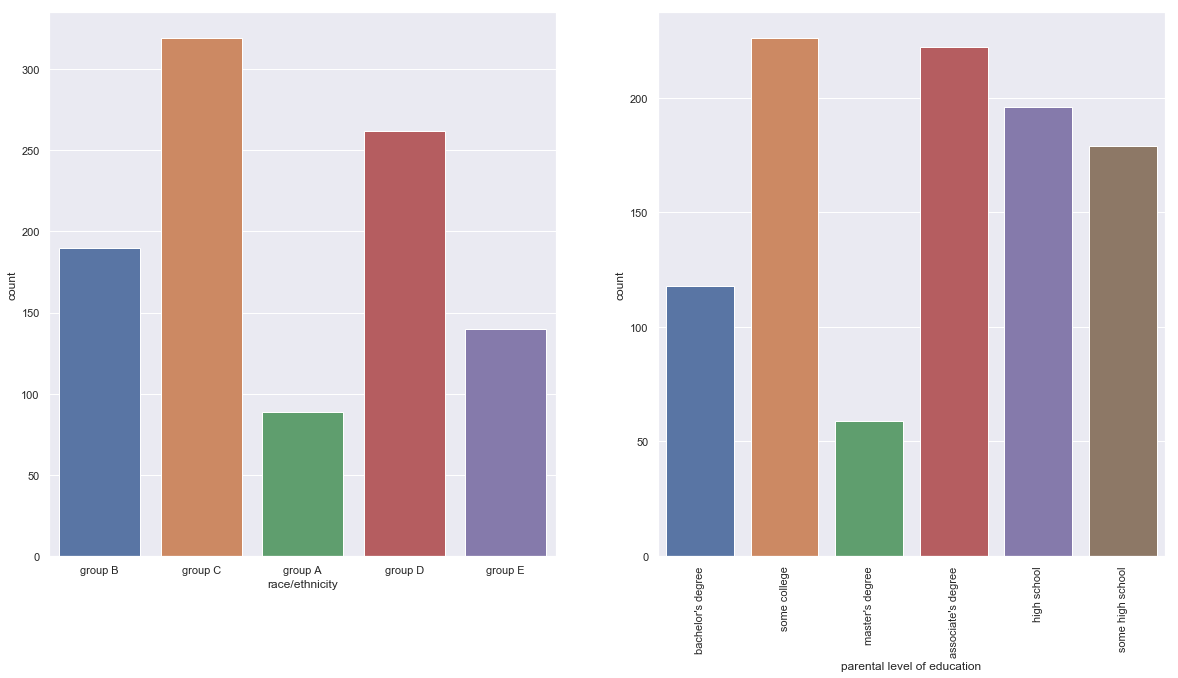

In [175]:
sns.set(style='darkgrid')

f, axes = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x = 'race/ethnicity', data=data, ax = axes[0] )
plt.xticks(rotation=90)
sns.countplot(x = 'parental level of education', data=data, ax = axes[1] )
plt.xticks(rotation=90)

plt.show()

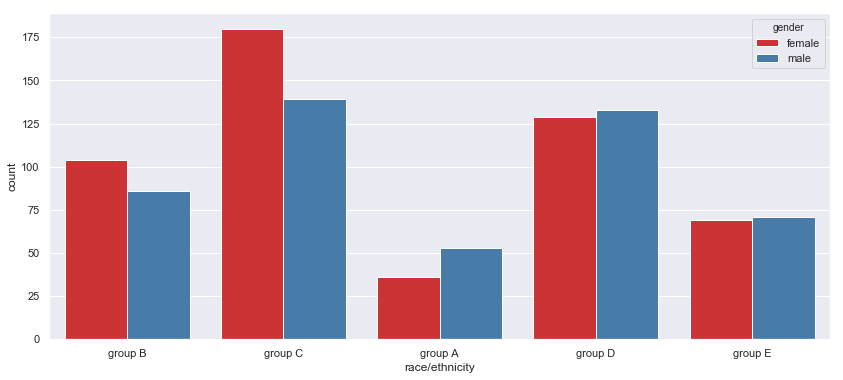

In [176]:
f, axes = plt.subplots(1,1, figsize=(14,6))

sns.countplot(x = 'race/ethnicity', data=data, hue ='gender',palette = 'Set1')

plt.show()

In [178]:
#To be continued (zzzzzzzzzzzzzzzzz)